In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Extract Zip file to local run time (to avoid wasting storage on drive)
!unzip -qq -n /content/drive/MyDrive/zipped_data.zip

,country-code,region-code,sub-region-code,intermediate-region-code,count
sub-region,,,,,
Northern America,1328.0,76.0,84.0,0.0,13410
Northern Europe,7078.0,2100.0,2156.0,830.0,5865
Western Europe,2840.0,1200.0,1240.0,0.0,5616
Latin America and the Caribbean,5950.0,304.0,6704.0,176.0,5202
Eastern Asia,2400.0,994.0,210.0,0.0,4805
Eastern Europe,3968.0,1200.0,1208.0,0.0,3578
South-eastern Asia,4234.0,1278.0,315.0,0.0,2777
Southern Europe,5571.0,1950.0,507.0,0.0,2757
Australia and New Zealand,590.0,18.0,106.0,0.0,2261


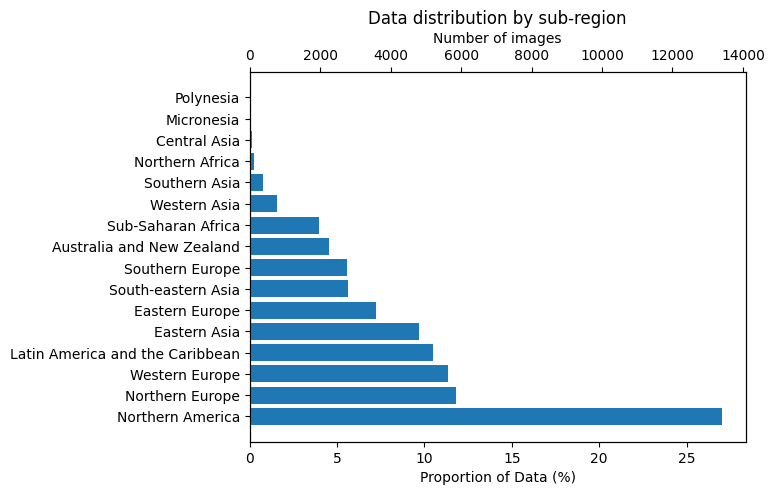

In [ ]:
# Load the Continent mapping CSV
continents_path = '/content/drive/MyDrive/continents2.csv'
con_df = pd.read_csv(continents_path)
con_df.head()
con_df.set_index('name',inplace=True)

# Use the Kaggle dataset to find the number of image to find subregions
count_base = 'compressed_dataset/'
data_count = {}
img_path = os.listdir(count_base)

for country in img_path:
    num_count = len(os.listdir(count_base+country))
    data_count[str(country)] =num_count
country_name_count = pd.DataFrame(data={'count':data_count.values()},index = data_count.keys())

# Create the joined data frame
new_df = con_df.join(country_name_count,how='right')

# Group by region
gr_df = new_df.groupby(['sub-region']).sum('count').sort_values('count')[::-1]
display(gr_df)
fig,ax = plt.subplots(1,1)

ax.barh(gr_df.index,gr_df['count']/sum(gr_df['count'])*100)
ax.set_xlabel('Proportion of Data (%)')
ax2 = ax.twiny()
ax2.set_xlabel('Number of images')
ax2.barh(gr_df.index,gr_df['count'])
ax.set_title('Data distribution by sub-region')
fig.show()

,country-code,region-code,sub-region-code,intermediate-region-code,count
sub-region,,,,,
Northern America,1328.0,76.0,84.0,0.0,13410
Northern Europe,7078.0,2100.0,2156.0,830.0,5865
Western Europe,2840.0,1200.0,1240.0,0.0,5616
Latin America and the Caribbean,5950.0,304.0,6704.0,176.0,5202
Eastern Asia,2400.0,994.0,210.0,0.0,4805
Eastern Europe,3968.0,1200.0,1208.0,0.0,3578
South-eastern Asia,4234.0,1278.0,315.0,0.0,2777
Southern Europe,5571.0,1950.0,507.0,0.0,2757
Australia and New Zealand,590.0,18.0,106.0,0.0,2261


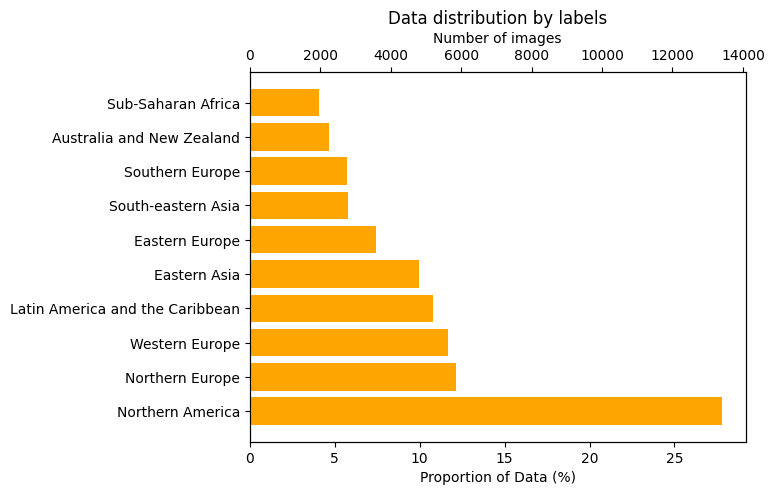

In [ ]:
# Regroup Data
group_1 = ['Central Asia','Western Asia', 'Southern Asia']
drop_group = ['Polynesia','Micronesia','Northern Africa'] + group_1 # Dropping group 1 after aggregate
# Create copy of group dataframe
regr_df = gr_df.copy()

regr_df = regr_df.drop(drop_group)
display(regr_df)

fig,ax = plt.subplots(1,1)
ax.barh(regr_df.index,regr_df['count']/sum(regr_df['count'])*100,color='orange')
ax.set_xlabel('Proportion of Data (%)')
ax.set_title('Data distribution by labels')

ax2 = ax.twiny()
ax2.set_xlabel('Number of images')
ax2.barh(regr_df.index,regr_df['count'],color='orange')
fig.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create mapping from labels to country
original_subr = gr_df.index.to_list()
label_country = {}
for sr in original_subr:
    if sr in regr_df.index:
        label_country[sr] = list(new_df.index[new_df.loc[:,'sub-region']==sr])

# Create mapping from labels to image_path
label_img = {}
for label,country in label_country.items():
    label_img[label] = []
    for c in country:
        img_path = os.listdir(f'compressed_dataset/{c}')
        img_path = [f'compressed_dataset/{c}/'+i for i in img_path]
        label_img[label] += img_path

In [ ]:
print(label_img.keys())

dict_keys(['Northern America', 'Northern Europe', 'Western Europe', 'Latin America and the Caribbean', 'Eastern Asia', 'Eastern Europe', 'South-eastern Asia', 'Southern Europe', 'Australia and New Zealand', 'Sub-Saharan Africa'])


## Removing Poorly Sizes Images

In [ ]:
from PIL import Image

# Find all image sizes
label_img_size = {}
for label, img_list in label_img.items():
  label_img_size[label] = [(path, Image.open(path).size) for path in img_list]

# Find the unique image sizes and their counts
unique_sizes = []
for label, img_list in label_img_size.items():
  for _, size in img_list:
    sizes = [s for s, _ in unique_sizes]
    if size not in sizes:
      unique_sizes.append((size, 1))
    else:
      unique_sizes[sizes.index(size)] = (unique_sizes[sizes.index(size)][0], unique_sizes[sizes.index(size)][1] + 1)

for size, count in unique_sizes:
  print(size[0], 'x', size[1], '-', count)

1536 x 662 - 48177
1030 x 703 - 54


In [ ]:
# Remove all images that are not the mode image size
size_mode = max([c for _, c in unique_sizes])
best_image_size = [s for s, c in unique_sizes if c == size_mode][0]

for label, img_list in label_img_size.items():
  label_img[label] = [path for path, size in img_list if size == best_image_size]

## Removing Excess Images

In [ ]:
import random

# Randomly downsample all categories to double the smallest category
max_category_labels = min([len(img_list) for _, img_list in label_img.items()]) * 2

for label, img_list in label_img.items():
  if len(img_list) > max_category_labels:
    random.shuffle(img_list)
    label_img[label] = img_list[:max_category_labels]

In [ ]:
print([len(img_list) for _, img_list in label_img.items()])

[3914, 3914, 3914, 3914, 3914, 3574, 2776, 2753, 2258, 1957]


## Crop & Resize Images

In [ ]:
import cv2

cleaned_dir = './cleaned_dataset/'
TOP_BOUND = 0
LEFT_BOUND = 76
RIGHT_BOUND = 1248
BOTTOM_BOUND = 470
MID_BOUND = (RIGHT_BOUND + LEFT_BOUND) // 2

RESIZE_HEIGHT = (BOTTOM_BOUND - TOP_BOUND) // 2
RESIZE_WIDTH = (MID_BOUND - LEFT_BOUND) // 2

# Make all of the directories
label_dirs = [label.lower().replace(' ', '_').replace('-', '_') for label in label_img.keys()]
for label_dir in label_dirs:
  os.makedirs(cleaned_dir + label_dir + '/', exist_ok = True)

for label_index, (_, img_list) in enumerate(label_img.items()):
  for img_index, img_path in enumerate(img_list):
    # Create images that are a good size without including the UI elements
    img = cv2.imread(img_path)
    img1 = img[TOP_BOUND:BOTTOM_BOUND, LEFT_BOUND:MID_BOUND]
    img2 = img[TOP_BOUND:BOTTOM_BOUND, MID_BOUND:RIGHT_BOUND]

    # Resize the images to be smaller
    resized_img1 = cv2.resize(img1, (RESIZE_HEIGHT, RESIZE_WIDTH), interpolation=cv2.INTER_AREA)
    resized_img2 = cv2.resize(img2, (RESIZE_HEIGHT, RESIZE_WIDTH), interpolation=cv2.INTER_AREA)

    cv2.imwrite(cleaned_dir + label_dirs[label_index] + '/' + str(img_index * 2) + '.jpg', resized_img1)
    cv2.imwrite(cleaned_dir + label_dirs[label_index] + '/' + str(img_index * 2 + 1) + '.jpg', resized_img2)

## Data Augmentation

In [ ]:
# Flip images horizontally until we have the required number of images in each category

for label_index, (_, img_list) in enumerate(label_img.items()):
  if len(img_list) < max_category_labels:
    for img_index in range(2 * (max_category_labels - len(img_list))):
      img = cv2.imread(cleaned_dir + label_dirs[label_index] + '/' + str(img_index) + '.jpg')
      img = cv2.flip(img, 1)
      cv2.imwrite(cleaned_dir + label_dirs[label_index] + '/' + str(img_index + 2 * len(img_list)) + '.jpg', img)

In [ ]:
for label_index in range(len(label_img.keys())):
  print(label_dirs[label_index], '-', len(os.listdir(cleaned_dir + label_dirs[label_index])))

northern_america - 7828
northern_europe - 7828
western_europe - 7828
latin_america_and_the_caribbean - 7828
eastern_asia - 7828
eastern_europe - 7828
south_eastern_asia - 7828
southern_europe - 7828
australia_and_new_zealand - 7828
sub_saharan_africa - 7828


In [ ]:
# Make zip file to local run time (to avoid wasting storage on drive)
!zip -qq -r /content/cleaned.zip /content/cleaned_dataset

In [ ]:
!cp /content/cleaned.zip /content/drive/MyDrive/cleaned.zip